# Hashtag study (on suspended users)

## Import

In [1]:
import pandas as pd
import json

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import sys
sys.path.insert(0, '../')

import general_utils as gen_ut
import hashtag_util as ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['hashtags','created_at','user_code_error'])

df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")
df = df.loc[df['user_code_error']==63,:]

df

,created_at,hashtags,user_code_error
127,2020-10-01 22:14:57+00:00,[],63.0
331,2020-10-01 21:17:51+00:00,[],63.0
547,2020-10-01 20:14:55+00:00,[],63.0
974,2020-10-01 19:03:25+00:00,"[{'text': 'Immuni', 'indices': [55, 62]}]",63.0
1177,2020-10-01 18:20:53+00:00,[],63.0
...,...,...,...
4050750,2021-05-18 09:06:47+00:00,[],63.0
4051263,2021-05-18 09:36:58+00:00,[],63.0
4051507,2021-05-18 09:50:11+00:00,[],63.0
4052339,2021-05-18 10:34:41+00:00,[],63.0


In [3]:
#Creating a map of all hashtags with the number of uses
listHashtags = []

for s in df['hashtags']:    
    [ listHashtags.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags = pd.DataFrame()
dfHashtags['hashtags'] = listHashtags
dfHashtags['count'] = 0

dfHashtags = dfHashtags.groupby('hashtags').count()
dfHashtags.sort_values(['count'],axis = 0,inplace=True,ascending=False)

dfHashtags

,count
hashtags,
vaccino,588
vaccini,304
COVID19,239
AstraZeneca,228
VaccinoAntiCovid,216
...,...
Parlamento,1
Pappalardo,1
Papa,1


In [4]:
dfUse = ut.process_dfUse(df)
dfUse

,Week/Year,hashtag,count
3629,2020-01-27,ValentinaNappi,1
3630,2020-01-27,coronarvirus,1
3631,2020-01-27,leminchiate,1
3685,2020-02-03,Coranavirus,1
3780,2020-02-10,Spallanzani,1
...,...,...,...
529,2021-05-17,coprifuoco,4
530,2021-05-17,covid,1
531,2021-05-17,dittaturasanitaria,1
524,2021-05-17,WhistleblowerInInglese,1


## General study

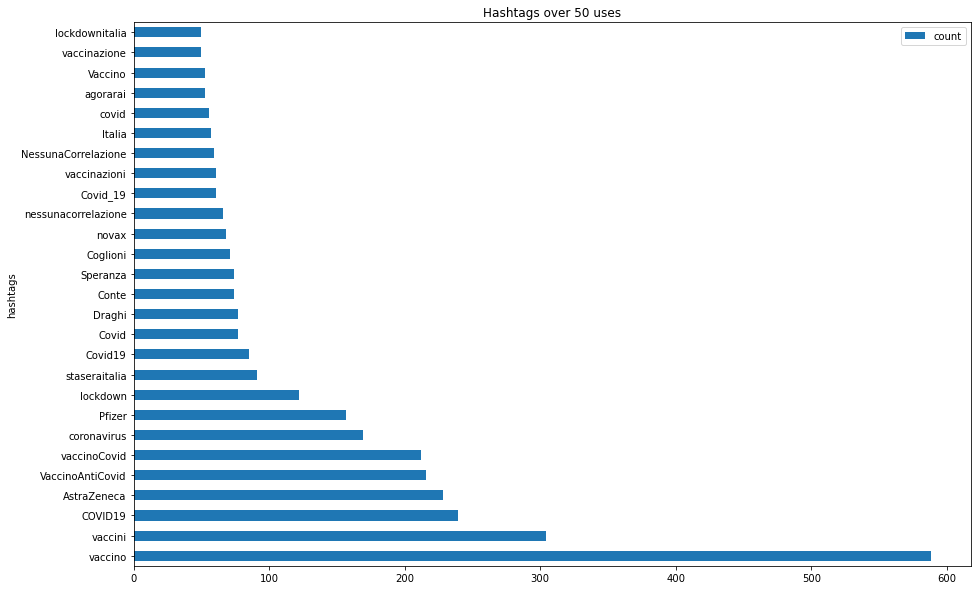

In [5]:
ut.visual_histogram(dfHashtags,50)

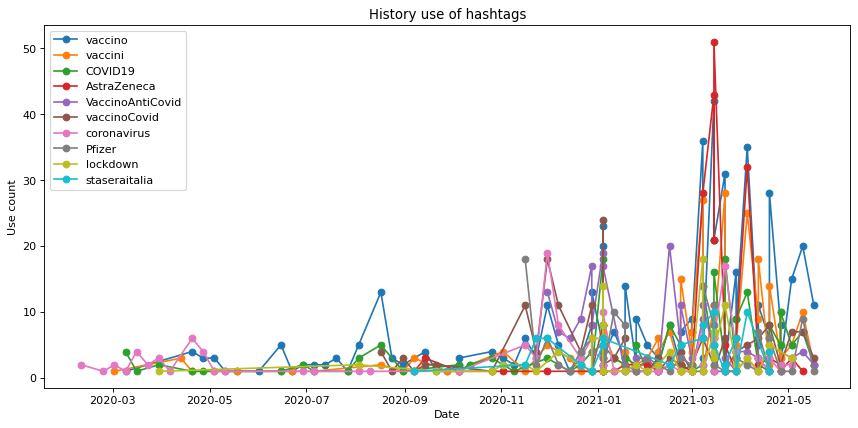

In [6]:
ut.visual_by_date_together(dfHashtags,dfUse)

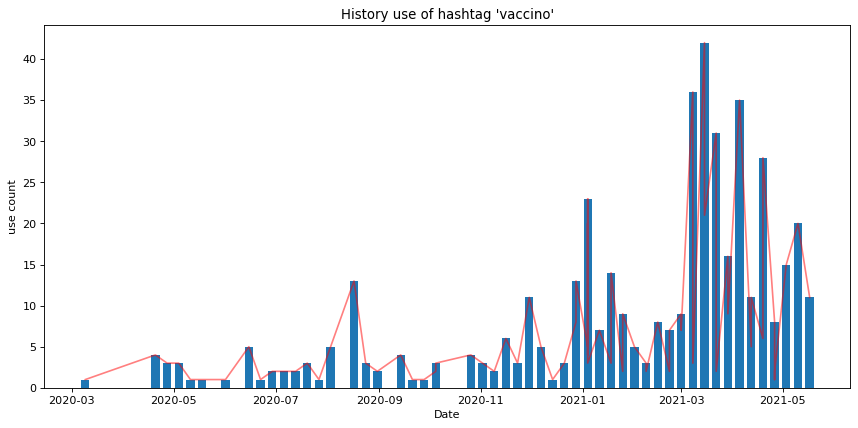

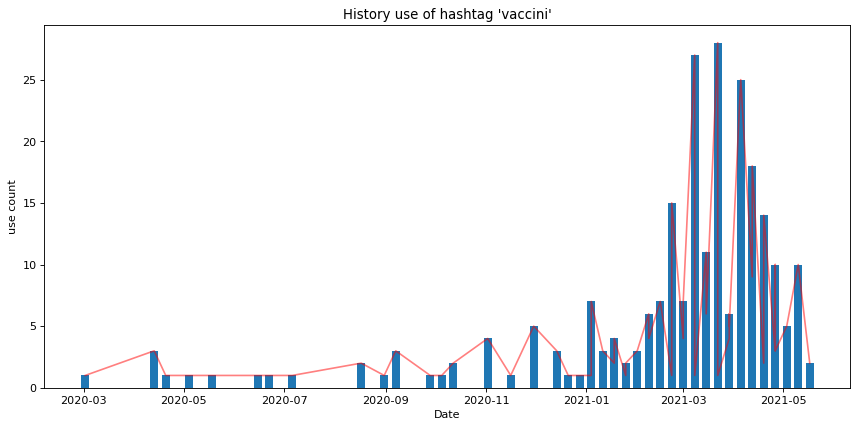

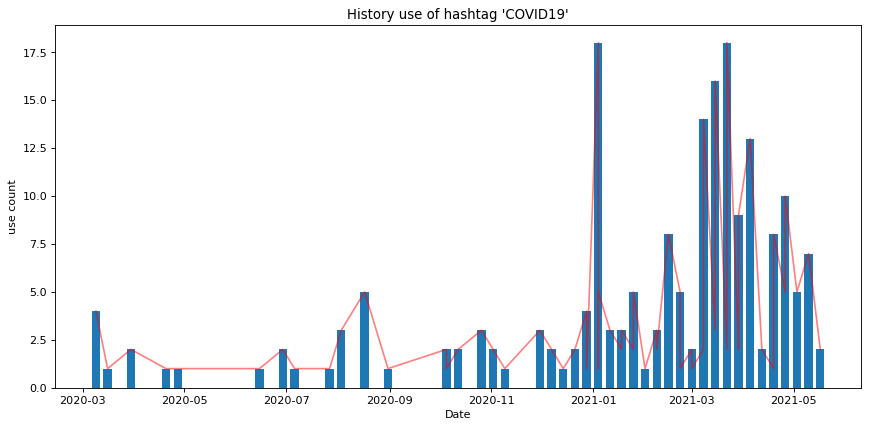

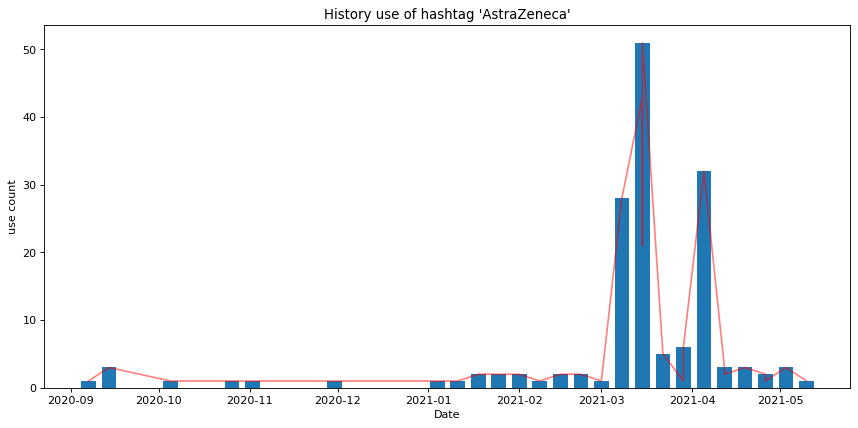

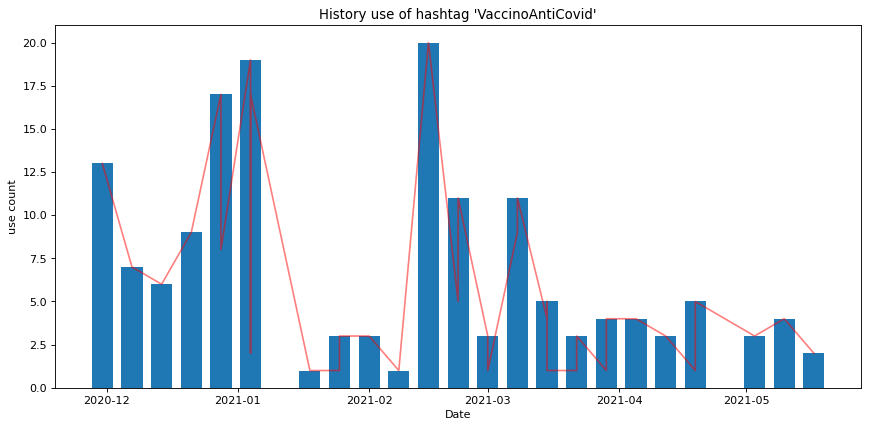

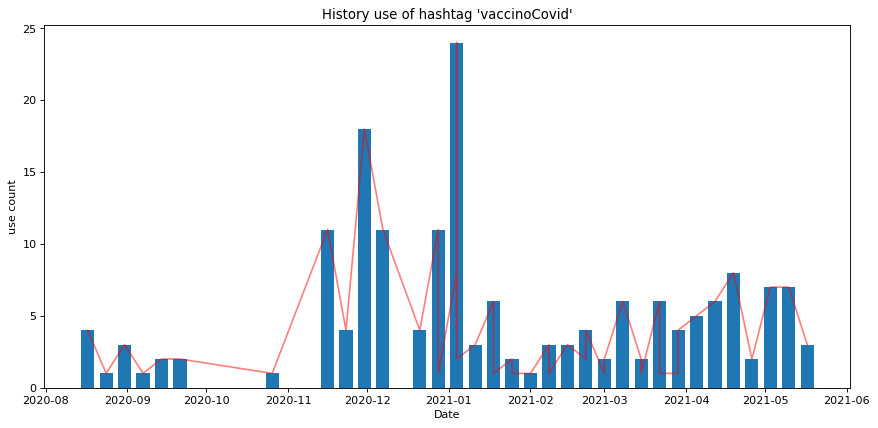

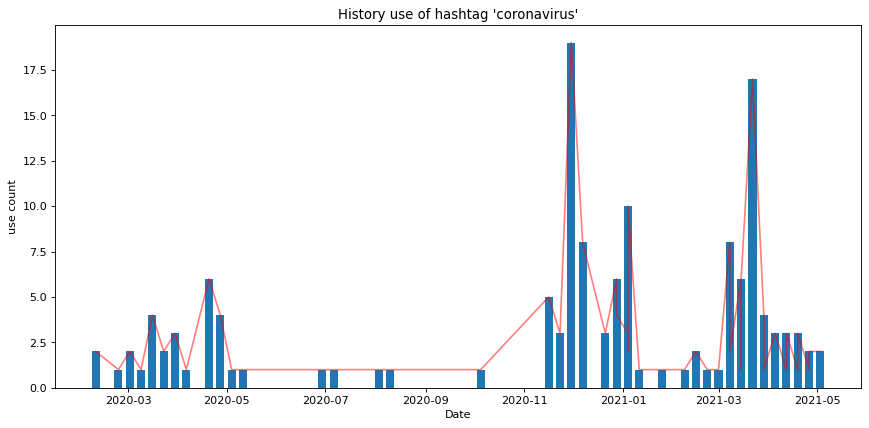

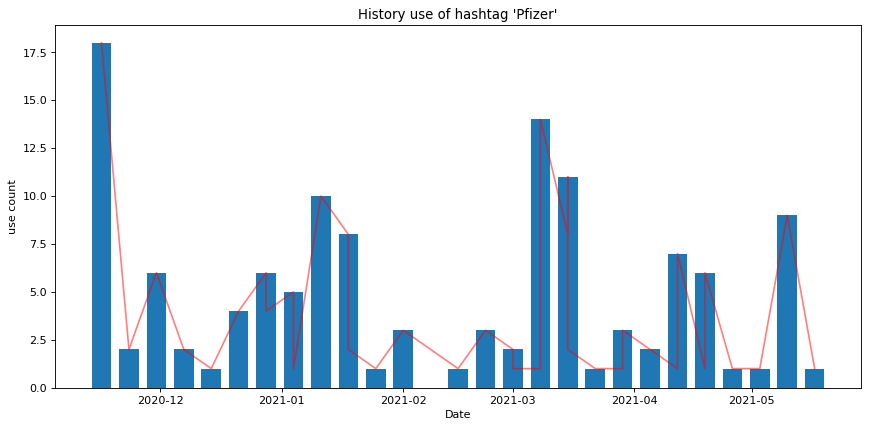

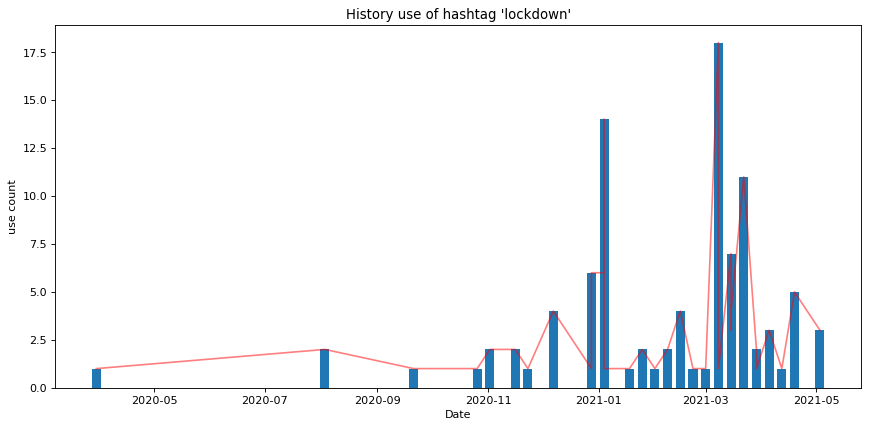

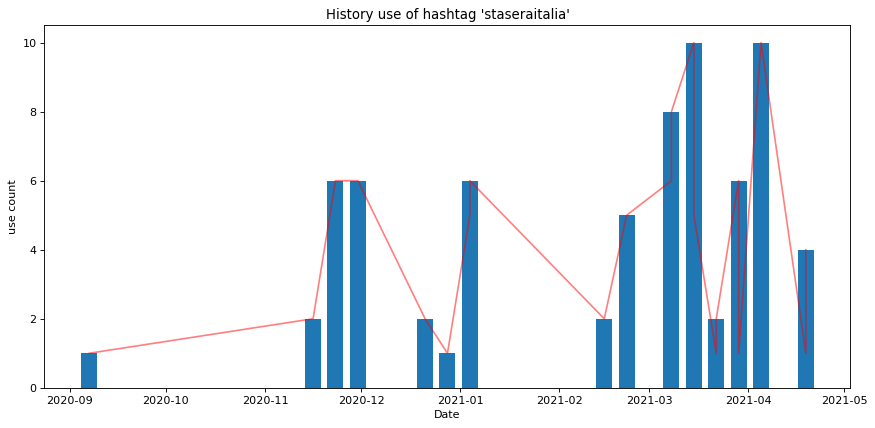

In [7]:
ut.visual_by_date_split(dfHashtags,dfUse)

## Study without some hastag

In [8]:
hastagRemove = ['vaccin.*','covid.*','corona.*','astrazeneca','pfizer','sarscov2','sputnikv','moderna']
dfHashtagFiltered = dfHashtags
for r in hastagRemove:
    mask = dfHashtagFiltered.index.str.lower().str.match(r) == True
    dfHashtagFiltered.drop(dfHashtagFiltered[mask].index, inplace=True)

dfHashtagFiltered

,count
hashtags,
lockdown,122
staseraitalia,91
Draghi,77
Conte,74
Speranza,74
...,...
Parlamento,1
Pappalardo,1
Papa,1


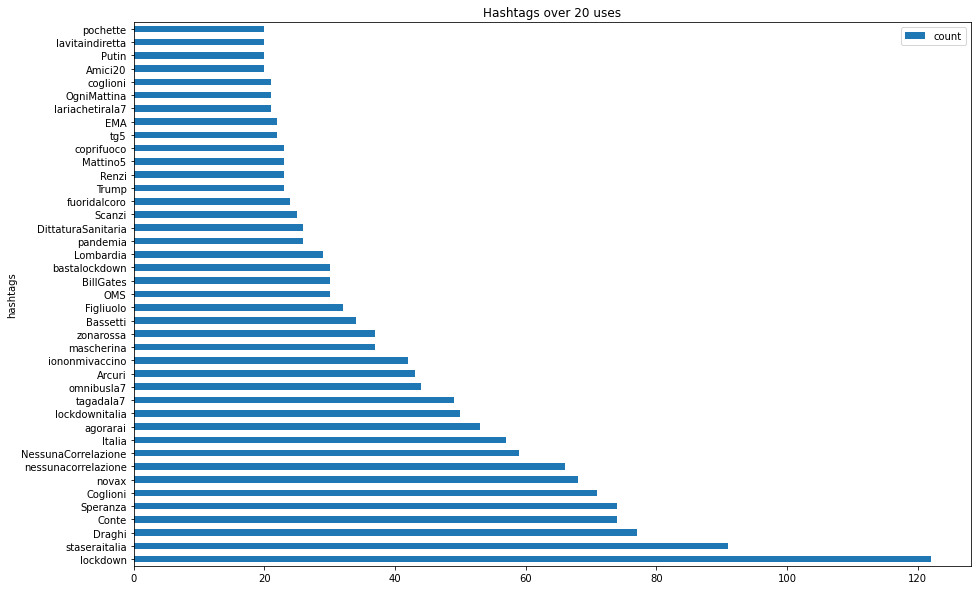

In [9]:
ut.visual_histogram(dfHashtagFiltered,20)

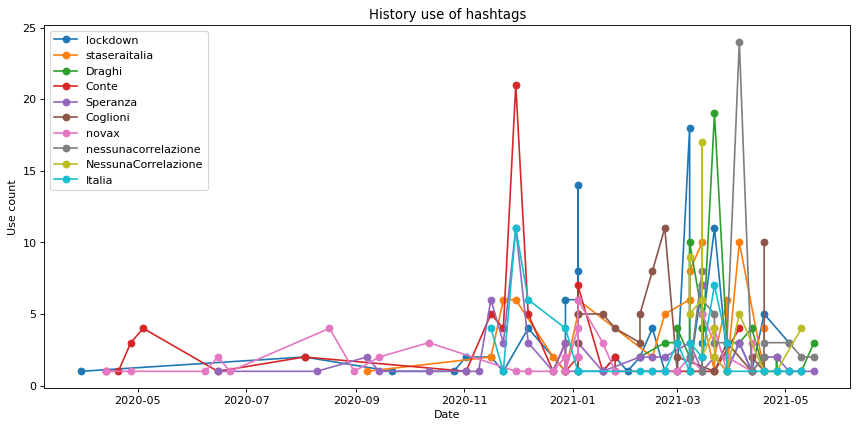

In [10]:
ut.visual_by_date_together(dfHashtagFiltered,dfUse)

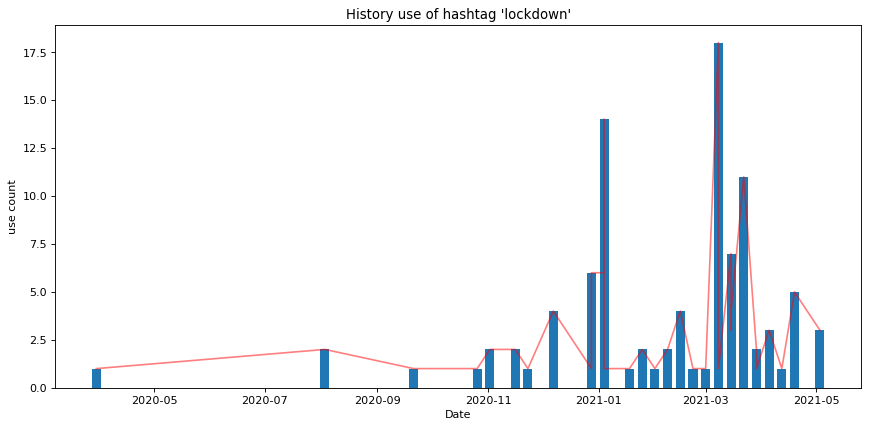

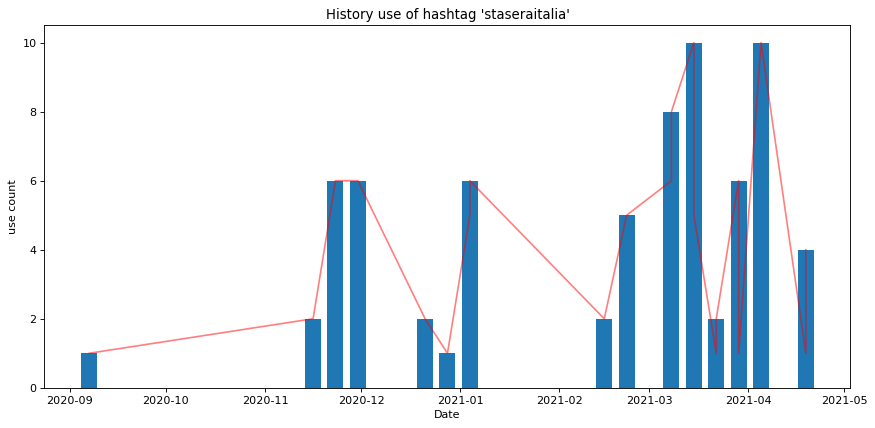

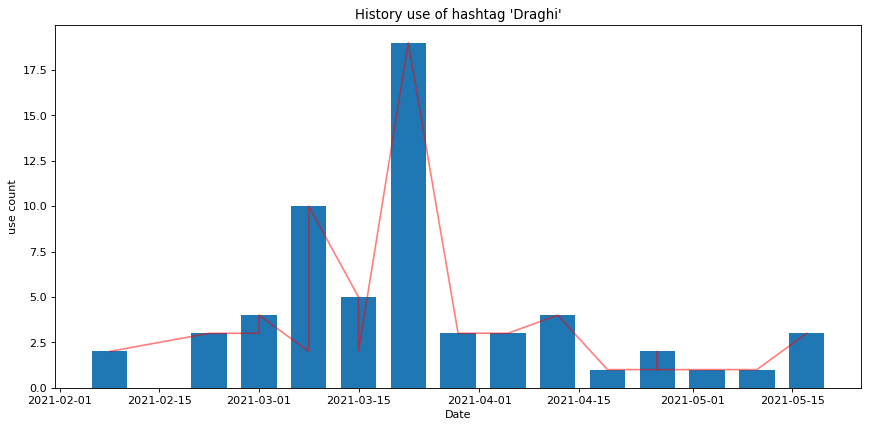

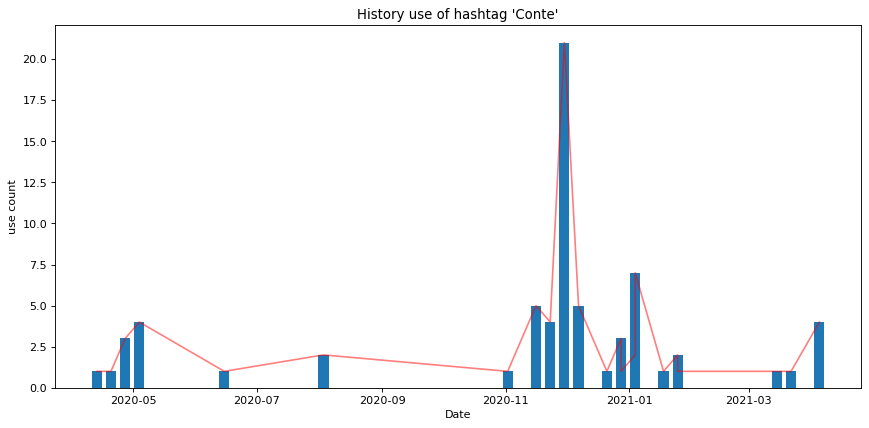

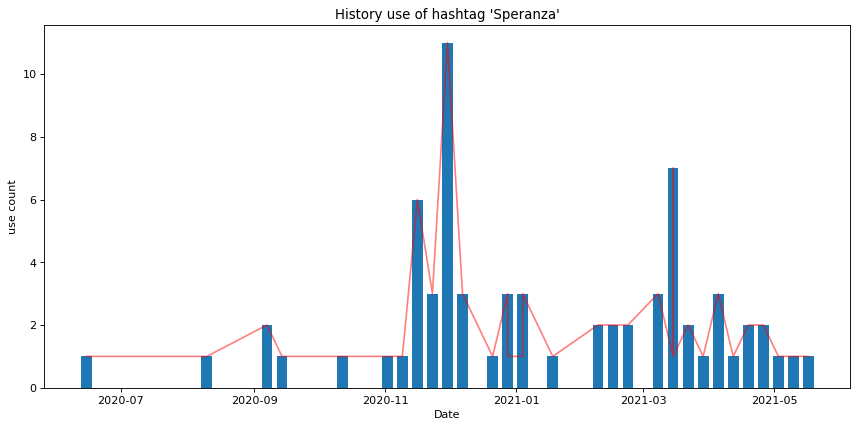

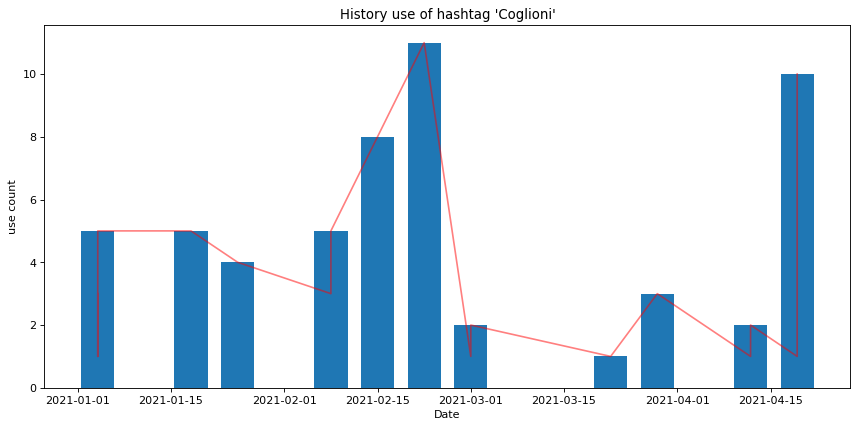

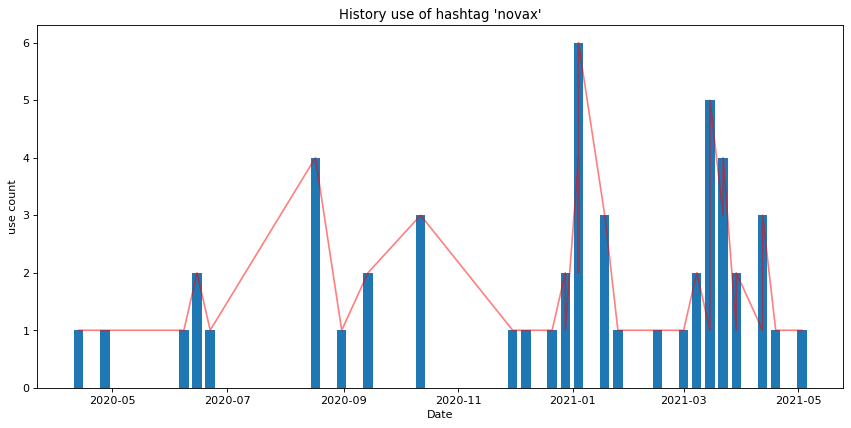

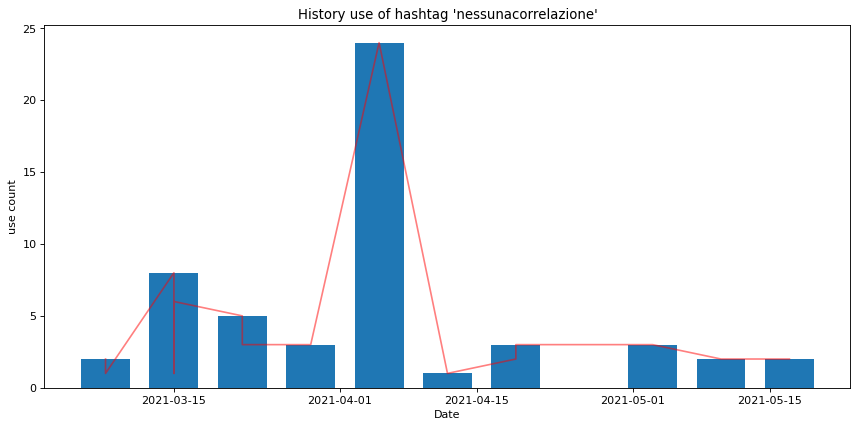

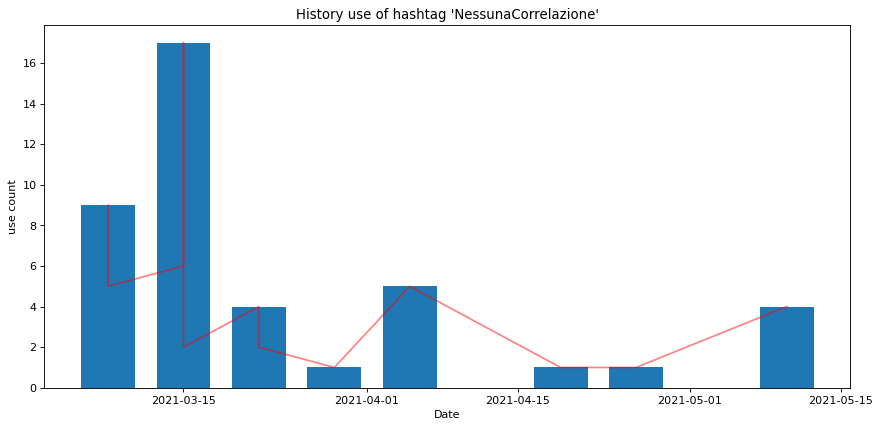

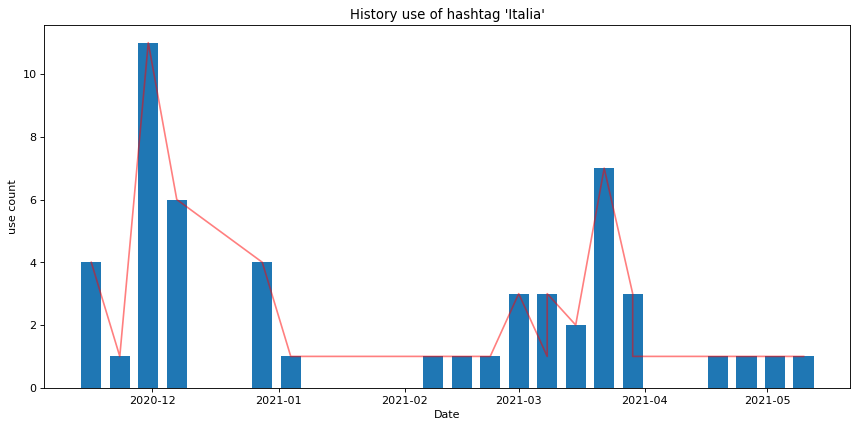

In [11]:
ut.visual_by_date_split(dfHashtagFiltered,dfUse)